### Open file

In [116]:
import pandas as pd
df = pd.read_csv("output/export.csv", sep="\t")
df[221:225]

,bsv,type,context,word,context.1,location,features
221,BSV-viti-RA-16_16-07-2019_cle0bfb92,html,baies à tailles de,pois,(31). Oïdium : Tou,15443-15447,"type=LEMMATIZED, uri=http://ontology.inrae.fr/..."
222,BSV-viti-RA-16_16-07-2019_cle0bfb92,html,"ppe. BSV n°15, 2019",Viticulture,", région AURA, éditi",16159-16170,"type=LEMMATIZED, uri=http://ontology.inrae.fr/..."
223,BSV-viti-RA-16_16-07-2019_cle0bfb92,html,Le plus tardif,baies,de la taille d'un p,16466-16471,"type=LEMMATIZED, uri=http://ontology.inrae.fr/..."
224,BSV-viti-RA-16_16-07-2019_cle0bfb92,html,s de la taille d'un,pois,", les grappes pe",16490-16494,"type=LEMMATIZED, uri=http://ontology.inrae.fr/..."


### Term frequency

In [117]:
df['word'].describe()

count      1396
unique       79
top       baies
freq        238
Name: word, dtype: object

In [118]:
counts = df['word'].value_counts()
counts.to_dict()

{'baies': 238,
 'Viticulture': 183,
 'vigne': 175,
 'Vigne': 171,
 'cultures': 93,
 'vignes': 68,
 'pois': 61,
 'viticulture': 38,
 'soleil': 29,
 'semences': 27,
 'gel': 27,
 'FRUIT': 22,
 'Raisin de table': 18,
 'VITICULTURE': 17,
 'culture': 16,
 'fleurs': 13,
 'baie': 12,
 'Vin': 12,
 'Gel': 11,
 'fruits': 10,
 'tournesol': 9,
 'vins': 9,
 'Melon': 8,
 'Vins': 7,
 'fruit': 7,
 'verger': 5,
 'raisin': 5,
 'Baies': 5,
 'agrumes': 4,
 'Noix': 4,
 'Noyers': 4,
 'VIGNE': 4,
 'raisin de table': 3,
 'Olivier': 3,
 'fleur': 3,
 'vergers': 3,
 'zones non agricoles': 3,
 'paille': 3,
 'pailles': 3,
 'orangé': 2,
 'melons': 2,
 'cerise': 2,
 'poire': 2,
 'mangue': 2,
 'amandiers': 2,
 'laurier': 2,
 'figue': 2,
 'goyave': 2,
 'oliviers': 2,
 'banane': 2,
 'fruitières': 2,
 'ananas': 2,
 'roses': 2,
 'tomates': 2,
 'citron': 2,
 'arbres fruitiers': 2,
 'fruits tropicale': 2,
 'rose': 2,
 'abricot': 2,
 'courges': 2,
 'poivrons': 2,
 'tomate': 2,
 'marron': 1,
 'gels': 1,
 'Vignes': 1,
 'fruiti

```with lowercase```

In [119]:
counts_l = df['word'].str.lower().value_counts()

In [155]:
dico = counts_l.to_dict()
dico

{'vigne': 350,
 'baies': 243,
 'viticulture': 238,
 'cultures': 94,
 'vignes': 69,
 'pois': 62,
 'gel': 38,
 'soleil': 30,
 'fruit': 29,
 'semences': 27,
 'raisin de table': 21,
 'vins': 16,
 'culture': 16,
 'baie': 13,
 'vin': 13,
 'fleurs': 13,
 'fruits': 10,
 'tournesol': 9,
 'melon': 8,
 'noyers': 5,
 'raisin': 5,
 'verger': 5,
 'agrumes': 4,
 'noix': 4,
 'zones non agricoles': 3,
 'fleur': 3,
 'paille': 3,
 'pailles': 3,
 'vergers': 3,
 'olivier': 3,
 'ananas': 2,
 'oliviers': 2,
 'arbres fruitiers': 2,
 'tomates': 2,
 'melons': 2,
 'poire': 2,
 'mangue': 2,
 'rose': 2,
 'roses': 2,
 'courges': 2,
 'cerise': 2,
 'amandiers': 2,
 'tomate': 2,
 'fruits tropicale': 2,
 'orangé': 2,
 'fruitières': 2,
 'poivrons': 2,
 'abricot': 2,
 'figue': 2,
 'citron': 2,
 'banane': 2,
 'goyave': 2,
 'laurier': 2,
 'gels': 1,
 'noisette': 1,
 'poirier': 1,
 'orange': 1,
 'fruitiers': 1,
 'oranges': 1,
 'noyer': 1,
 'marron': 1,
 'rosiers': 1,
 'raisins': 1}

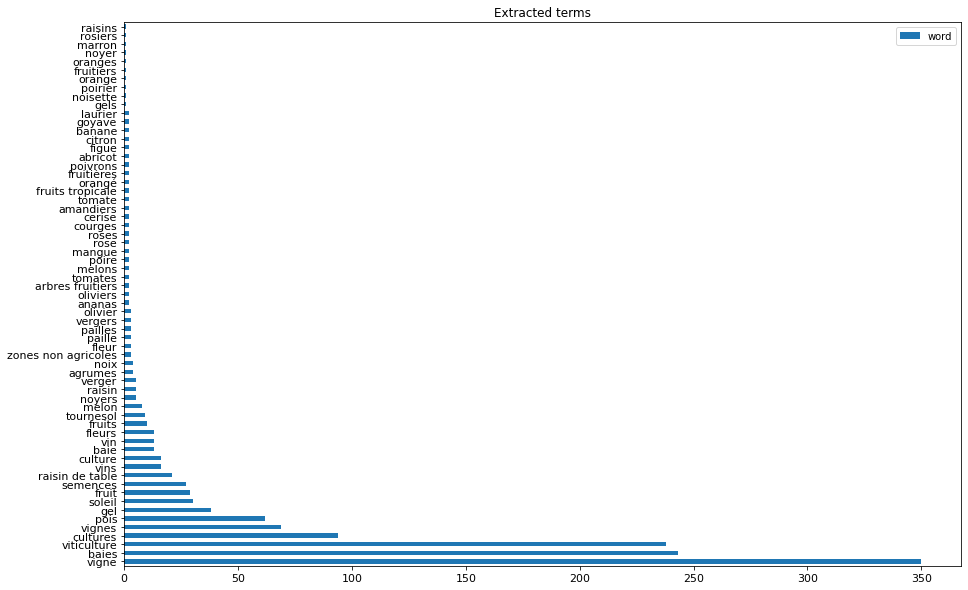

In [121]:
ax = counts_l.plot(kind='barh', title ="Extracted terms",figsize=(15,10),legend=True, fontsize=11, stacked=True)

```lowercase + singular```

In [ ]:
# sing column to do with alvisnlp

### Per doc

In [122]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df.groupby(['bsv', 'word'])['word'].describe())

                                                                       count  \
bsv                                                word                        
20190619_LOR_BSV_Viticulture_cle8c2fdf             CULTURES                1   
                                                   FRUIT                   5   
                                                   VIGNE                   1   
                                                   Vigne                   1   
                                                   cultures                1   
                                                   vigne                   2   
20190710_LOR_BSV_Viticulture_cle8bd128             Baies                   4   
                                                   FRUIT                   4   
                                                   VIGNE                   1   
                                                   Vigne                   1   
                                        

In [123]:
df1 = df[['bsv','word']].groupby(['bsv', 'word'])['word'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             
df1

,bsv,word,count
34,BSV-viti-RA-15_09-07-2019_cle01ba24,baies,52
46,BSV-viti-RA-16_16-07-2019_cle0bfb92,baies,43
32,BSV-viti-RA-15_09-07-2019_cle01ba24,Viticulture,20
36,BSV-viti-RA-15_09-07-2019_cle01ba24,pois,18
45,BSV-viti-RA-16_16-07-2019_cle0bfb92,Viticulture,17
...,...,...,...
250,BSV_Viticulture_2_17_mai_2019_cle8f88af,ananas,1
249,BSV_Viticulture_2_17_mai_2019_cle8f88af,amandiers,1
248,BSV_Viticulture_2_17_mai_2019_cle8f88af,agrumes,1
247,BSV_Viticulture_2_17_mai_2019_cle8f88af,abricot,1


In [124]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df.groupby(['bsv', 'word'])['word'].describe().sort_values('count', ascending=False))

                                                                       count  \
bsv                                                word                        
BSV-viti-RA-15_09-07-2019_cle01ba24                baies                  52   
BSV-viti-RA-16_16-07-2019_cle0bfb92                baies                  43   
BSV-viti-RA-15_09-07-2019_cle01ba24                Viticulture            20   
                                                   pois                   18   
BSV-viti-RA-16_16-07-2019_cle0bfb92                Viticulture            17   
bsv_viti_lr_n17_30072019_cle8cc4c8                 Viticulture            14   
BSV_NA_VIGNE_CHARENTES_07_20190514_cle841735       Vigne                  13   
BSV_NA_VIGNE_Limousin_17_20190730_cle835848        Vigne                  12   
BSV_NA_VIGNE_Haut-Poitou_13_20190709_cle44ed93     baies                  12   
BSV-viti-RA-03_16-04-2019_cle0bbc57                Viticulture            12   
BSV_NA_VIGNE_Nord_Aquitaine_19_20190730_

In [226]:
import plotly.express as px
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x=true_labels, y=features)
fig.show()

In [238]:
import plotly.graph_objects as go

features = list(dico.values()) 
true_labels = list(dico.keys())

fig = go.Figure(data=[go.Scatter(
    x=true_labels, y=features,
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=features,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

In [232]:
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x=features,
    y=true_labels,
    mode='markers',
    marker=dict(
        size=features,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

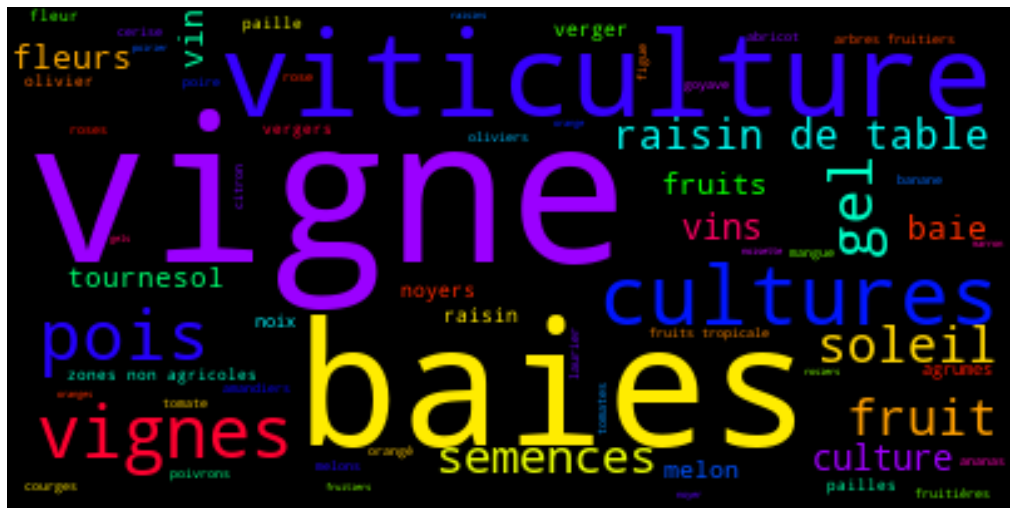

In [202]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dico)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()